<h1>Breast Cancer Detection</h1>


Ten real-valued features are computed for each cell nucleus: 
1. radius: mean of distances from center to points on the perimeter 
2. texture: standard deviation of gray-scale values
3. perimeter
4. area
5. smoothness: local variation in radius lengths 
6. compactness: permeter^2/area-1.0 
7. concavity: severity of concave portions of the contour
8. symmetry
9. fractal dimension: coastline approximation - 1
There are 357 benign and 212 maalignant. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
data_breast_Can = pd.read_csv("data.csv")

In this dataset, there are 569 observations and 33 variables. Wisconsin breast cancer (diagnosis) dataset, predicting whether the cancer is benign or malignant. Features are calculated from digitized images of fine needle aspiration (FNA) of breast lumps. They characterize the presence of nuclei in the images. The mean, standard error and "worst" or largest (mean of the three The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [4]:
#print the head of the data frame.
data_breast_Can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The info function used above give the details description of the dataframe. From the following we
can see that, the dataframe contain 32 Varibales with 569 Observations.
The DataType associated are: ##### 1. Integer ##### 2. Object ##### 3. Float
The variables named are: Diagnosis type: Malignant or Benign There are the cancerous Cells and
the parameters associated for the following type of Cancer Cells are:
1. Radius, 2. Texture, 3. Perimeter, 4. Area, 5. Smoothness, 6. Compactness, 7.Concavity, 8. Concave etc.

In [5]:
data_breast_Can[['Unnamed: 32']].head(n = 2)

,Unnamed: 32
0,NaN
1,NaN


In [6]:
data_breast_Can = data_breast_Can.drop(['Unnamed: 32'], axis=1)

In [107]:
data_breast_Can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [108]:
data_breast_Can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
data_breast_Can.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

 0.0.1 There are no missing values in this datset.

In [7]:
 # Method 1
# data_breast_Can['diagnosis_fact'] = data_breast_Can['diagnosis'].map({'M': 1,␣,→'B': 0})
# Method 2
labelencoder_Y = LabelEncoder()
data_breast_Can['diagnosis_fact'] = labelencoder_Y.fit_transform(data_breast_Can.diagnosis)

0.0.2 The Correlation need the numerical variable to compute the value of correlation
between 0 & 1. And Find out w

In [111]:
data_breast_Can.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_fact
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


This triangle correlation plot is between the features mean. As we can see, diagnosis_fact has low corrleation with texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean, which below than 0.5. There is also a high correlation between the two sets of features， (perimeter_mean & radius_mean, area_mean & radius_mean, area_mean & permeter_mean, concavity_points & concave points_mean). The above data are all greater than 0.9, indicating the presence of multicollinearity.  diagnosis_fact is the focus of "prediction" here. The correlation between "predictor variables and response" is a good indication of better predictability. However, the correlation "between predictor variables" is an issue that needs to be corrected to produce a reliable model.

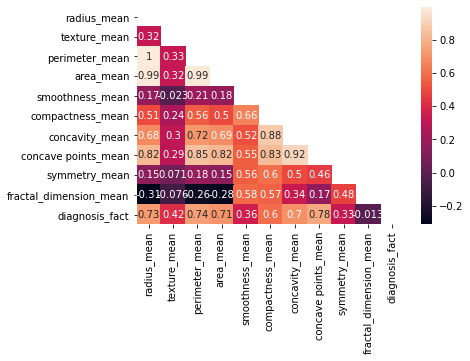

In [8]:
# data_mean = data_breast_Can.iloc[:, 2:11]
data_mean = data_breast_Can[['radius_mean','texture_mean',
'perimeter_mean', 'area_mean',
'smoothness_mean', 'compactness_mean',
'concavity_mean', 'concave points_mean',
'symmetry_mean', 'fractal_dimension_mean',
'diagnosis_fact']]
# data_se = data_breast_Can.iloc[:, 12:21]
data_se = data_breast_Can[['radius_se','texture_se',
'perimeter_se', 'area_se',
'smoothness_se', 'compactness_se',
'concavity_se', 'concave points_se',
'symmetry_se', 'fractal_dimension_se',
'diagnosis_fact']]
data_worst = data_breast_Can.iloc[:, 22:33]
correlation_mean = data_mean.corr()
sns.heatmap(correlation_mean,mask = np.triu(correlation_mean), annot = True)
plt.show()

Repeatedly test the interrelationship between sd variables.We can find that most of the features and diagnosis_fact are not more than 0.7 correlation coefficient.This may indicate that the correlation between "se predictor variables and response" does not indicate a better predictability. The correlation coefficients between the variables are consistent with those of the previous one.

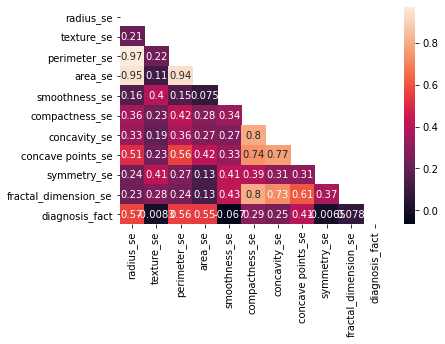

In [9]:
correlation_se = data_se.corr()
sns.heatmap(correlation_se,mask = np.triu(correlation_se), annot = True)
plt.show()


The correlation coefficients of variables with "worst" characteristics and "mean" are the same. Only four of the variables have correlation coefficients below 0.5 with diagnose_fact. Therefore, the other variables show better predictability for the response variables.

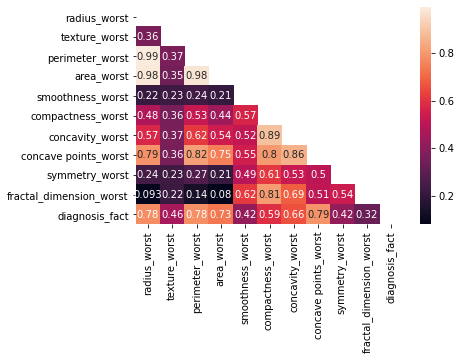

In [10]:
correlation_worst = data_worst.corr()

sns.heatmap(correlation_worst,mask = np.triu(correlation_worst), annot = True)

plt.show()


All the characteristic variables are almost right-skew distribution. Only very few are close to normal distribution. Log-transformation is considered when forming the model in order to have a more suitable distribution.

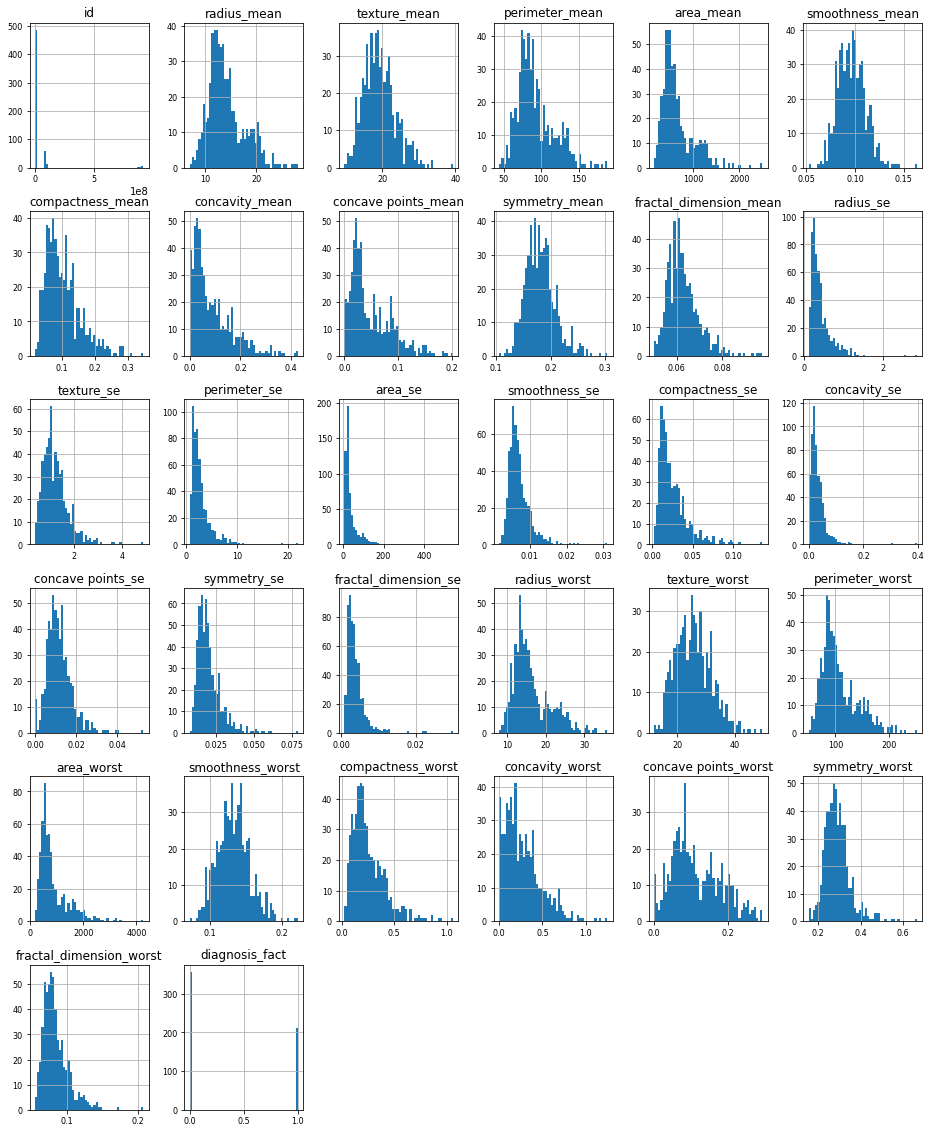

In [11]:
data_breast_Can.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In total, there were 357 benign and 212 malignant in our total results. benign accounted for 62.7% of the total and 37.3% is Malignant.  

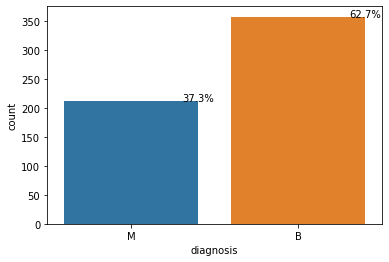

In [12]:
total = float(len(data_breast_Can))
ax = sns.countplot(x='diagnosis', data=data_breast_Can)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In the following chart, we select 4 independent variables and response variables. In the scatter plot, it can be clearly seen that M and B are clustered, with most of B on the left and M on the other side. Or one is above and one is below. Therefore, the clustering algorithm can be considered. The basis of the clustering algorithm is to find a way to separate a batch of samples into multiple classes, ensuring that the samples in each class are similar to each other, while the samples in different classes are different from each other. In the subsequent analysis, methods such as hierarchical clustering, k-means algorithm, etc. can be considered.

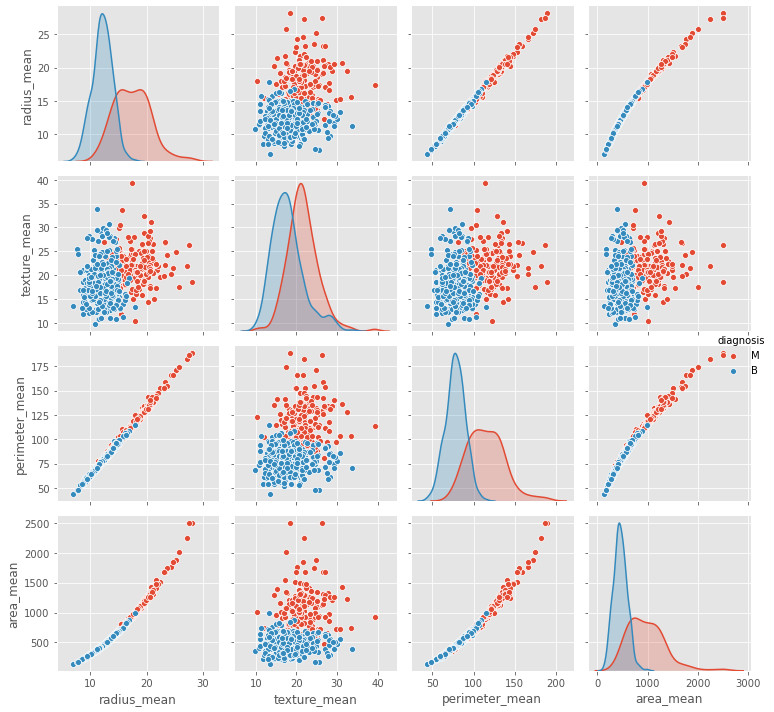

In [117]:
variable_cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean","area_mean"]
sns.pairplot(data_breast_Can[variable_cols], hue="diagnosis")
plt.show()

## KNN model

In [14]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [15]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
  
data_breast_Can['diagnosis_fact'] = data_breast_Can['diagnosis'].apply(diagnosis_value)

In [120]:
data_breast_Can

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_fact
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


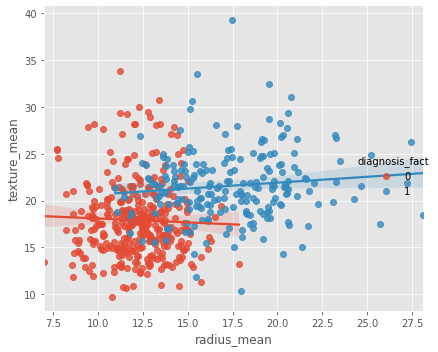

In [121]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean',
hue = 'diagnosis_fact', data = data_breast_Can)

In [16]:
X = np.array(data_breast_Can.iloc[:, 2:32])
y = np.array(data_breast_Can['diagnosis_fact'])
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 1234)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (455, 30)
test feature shape:  (114, 30)


In [123]:
data_breast_Can.shape

(569, 33)

In [124]:
# knn
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9298245614035088

In [125]:
# using the performing Cross validation
neighbors = []
cv_scores = []
for k in range(1, 50, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
    knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [126]:
MSE = [1-x for x in cv_scores]
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

The optimal number of neighbors is  7 


In [127]:
result = {"kNN value": neighbors,"Accuracy": cv_scores, "MSE": MSE}
knn_result = pd.DataFrame(data = result)
print(knn_result)

    kNN value  Accuracy       MSE
0           1  0.925362  0.074638
1           3  0.923092  0.076908
2           5  0.936184  0.063816
3           7  0.938357  0.061643
4           9  0.936329  0.063671
5          11  0.936232  0.063768
6          13  0.934106  0.065894
7          15  0.927488  0.072512
8          17  0.927488  0.072512
9          19  0.929710  0.070290
10         21  0.925314  0.074686
11         23  0.925314  0.074686
12         25  0.927536  0.072464
13         27  0.920966  0.079034
14         29  0.920966  0.079034
15         31  0.918744  0.081256
16         33  0.920918  0.079082
17         35  0.920918  0.079082
18         37  0.923140  0.076860
19         39  0.920918  0.079082
20         41  0.920918  0.079082
21         43  0.918792  0.081208
22         45  0.916570  0.083430
23         47  0.916618  0.083382
24         49  0.914396  0.085604


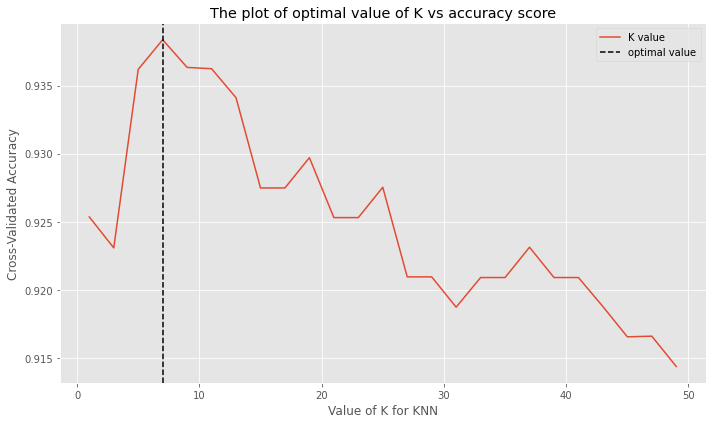

In [128]:
plt.figure(figsize = (10, 6))
plt.plot(neighbors, cv_scores)
plt.axvline(x=7,color='k', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title("The plot of optimal value of K vs accuracy score")
plt.legend(["K value", "optimal value"])
plt.show()

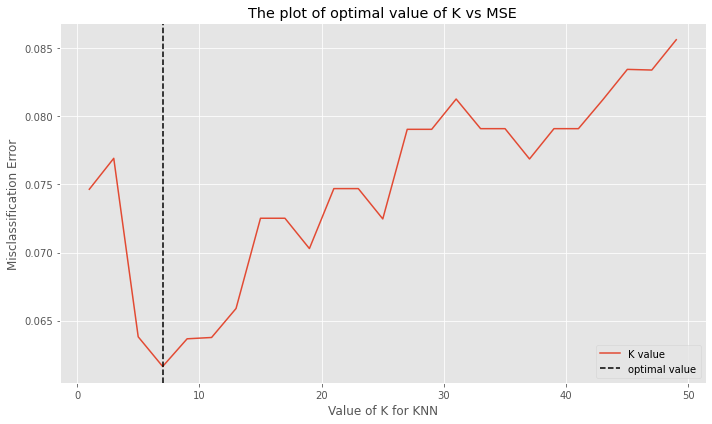

In [129]:
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.axvline(x=7,color='k', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Misclassification Error')
plt.title("The plot of optimal value of K vs MSE")
plt.legend(["K value", "optimal value"])
plt.show()

In [130]:
knn_optimal = KNeighborsClassifier(n_neighbors = 7)
knn_optimal.fit(X_train, y_train)
pred = knn_optimal.predict(X_test)
accuracy_score(pred, y_test)

0.9298245614035088

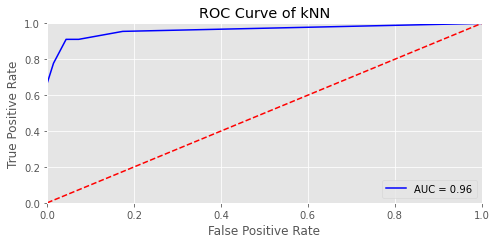

In [131]:
y_scores = knn_optimal.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Confusion Metrix:
 [[65  4]
 [ 4 41]]


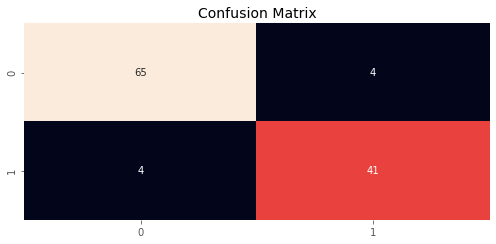

In [132]:
cm_knn = confusion_matrix(pred, y_test)

print("Confusion Metrix:\n", metrics.confusion_matrix(pred,y_test))

df_cm_knn = pd.DataFrame(cm_knn, range(2), range(2))

sns.heatmap(df_cm_knn, annot=True, cbar=False)
plt.title("Confusion Matrix", fontsize=14)
plt.savefig("Confusion Matrix.png", dpi=200)

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


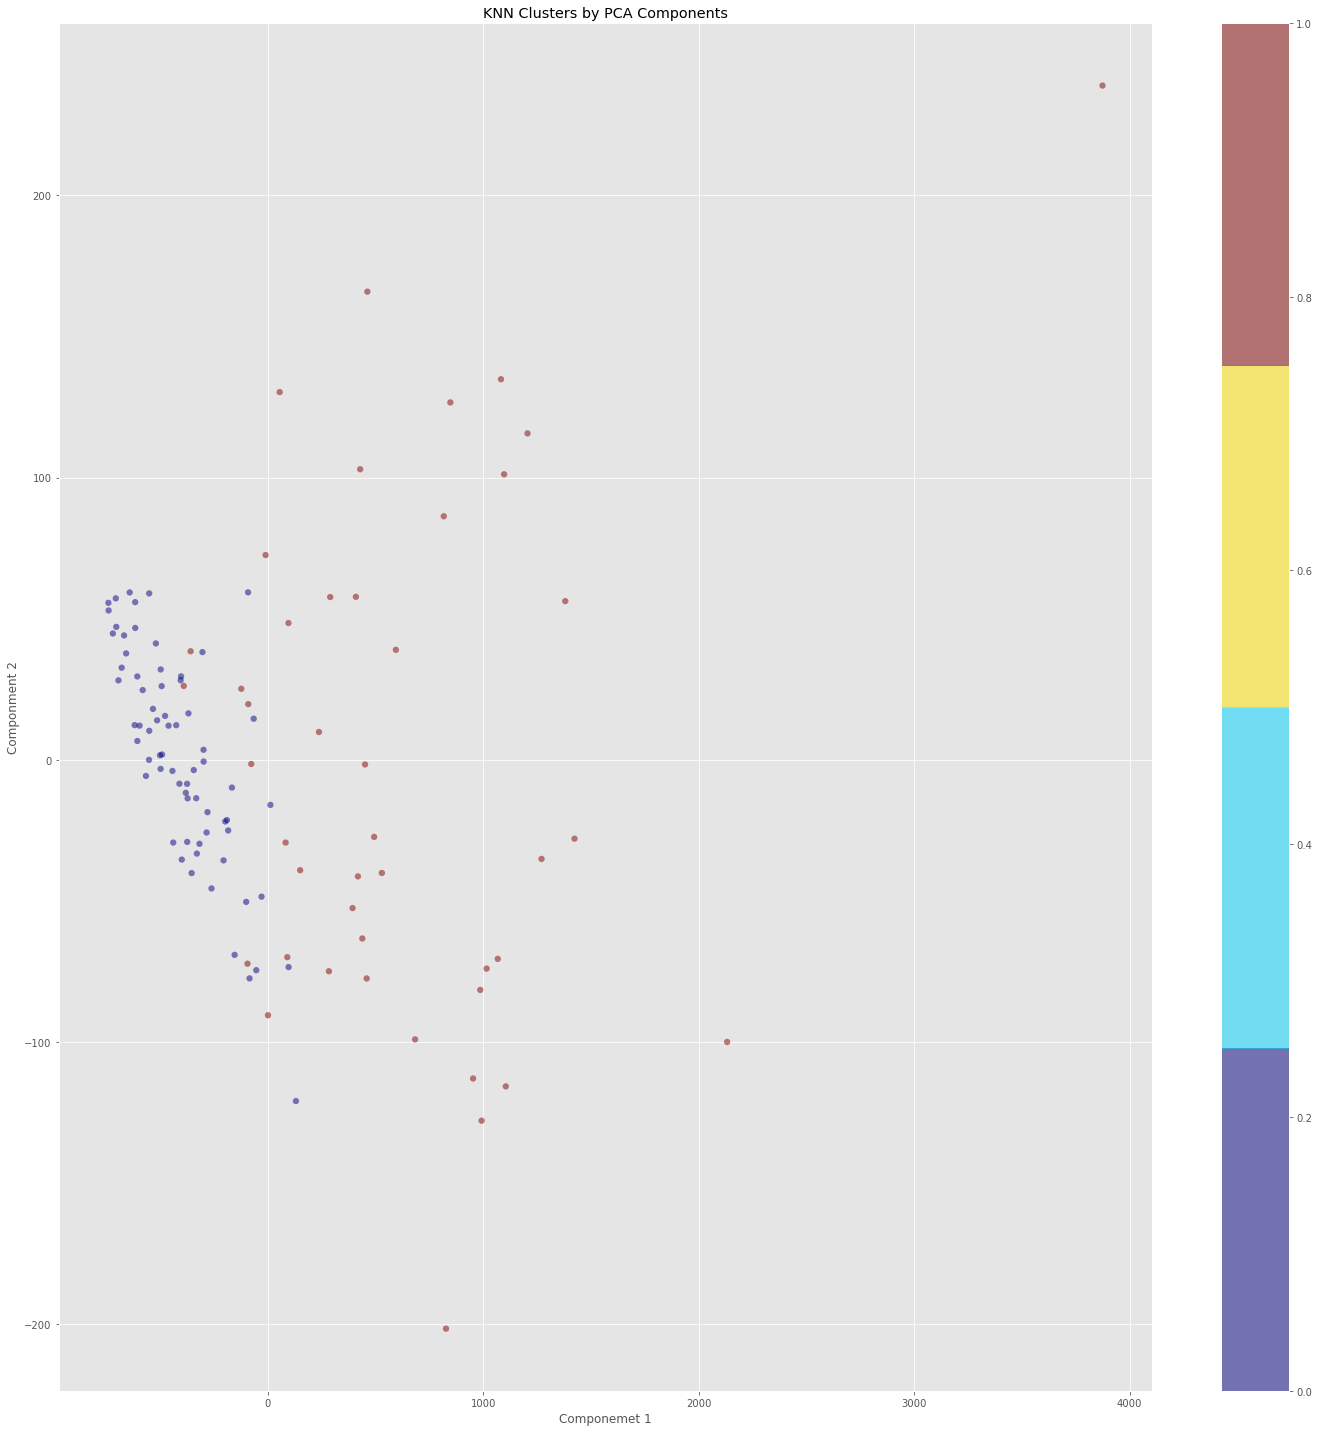

In [134]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_test)
plt.figure(figsize = (20, 20))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c= y_test, edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 4), s=40)
plt.title('KNN Clusters by PCA Components')
plt.xlabel("Componemet 1")
plt.ylabel("Componment 2")
plt.colorbar()


In [151]:
def data_plot(X_reduced,y,y_predict,n,title,f,axs):
    # create meshgrid
    #plot the negative points and positive points
    axs.set_title(title,fontsize=20)
    neg_val1 = X_reduced[np.where(y == 0), 0]
    neg_val2 = X_reduced[np.where(y == 0), 1]
    pos_val1 = X_reduced[np.where(y == 1), 0]
    pos_val2 = X_reduced[np.where(y == 1), 1]
    resolution = 500 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_reduced[:,0]), np.max(X_reduced[:,0])
    X2d_ymin, X2d_ymax = np.min(X_reduced[:,1]), np.max(X_reduced[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=n).fit(X_reduced, y_predict) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    axs.contourf(xx, yy, voronoiBackground)
    l1 = axs.scatter(neg_val1, neg_val2, marker='o', c='red')
    l2 = axs.scatter(pos_val1, pos_val2, marker='x', c='green')
    f.legend((l1, l2), ('Malignant', 'Benign'), 'upper left',fontsize=15)

In [152]:
from sklearn.decomposition import TruncatedSVD
X_train_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(X_train)
X_test_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(X_test)

knn_test = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

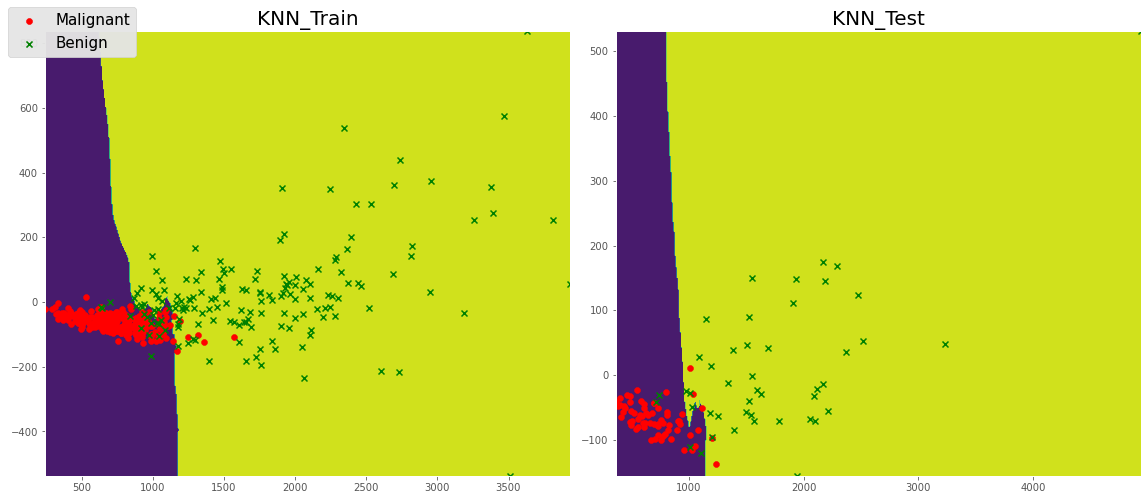

In [156]:
f, axs = plt.subplots(1,2,figsize=(16,7))
data_plot(X_train_reduced,y_train,knn_test.predict(X_train), 7,'KNN_Train',f,axs[0])
data_plot(X_test_reduced,y_test,knn_test.predict(X_test),7 ,'KNN_Test',f,axs[1])

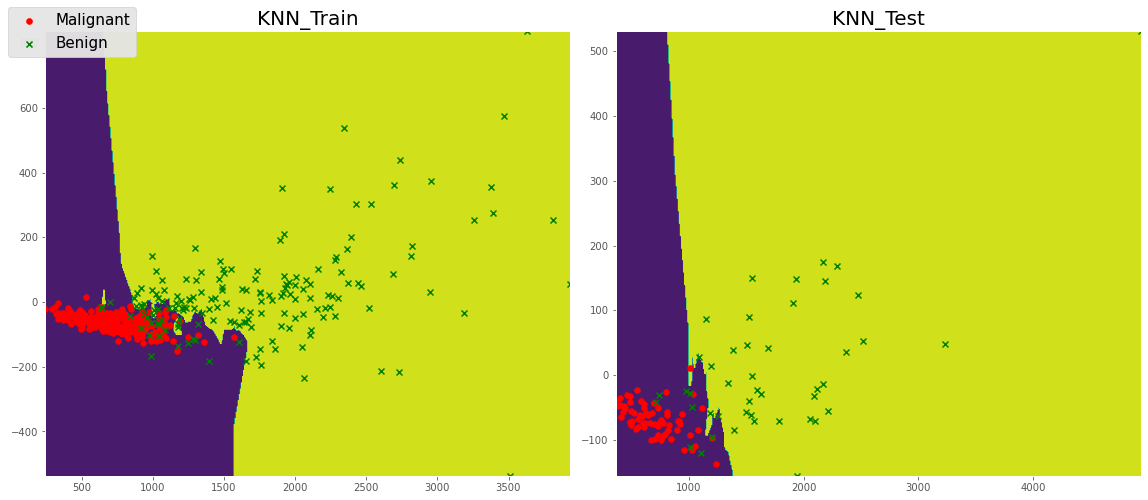

In [157]:
knn_test_sec = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
f, axs = plt.subplots(1,2,figsize=(16, 7))
data_plot(X_train_reduced,y_train,knn_test_sec.predict(X_train),2,'KNN_Train',f,axs[0])
data_plot(X_test_reduced,y_test,knn_test_sec.predict(X_test),2,'KNN_Test',f,axs[1])

### SVM Model

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# splitting dataset into train and test
from sklearn.model_selection import train_test_split


#SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# accuracy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
# Splitting the data into train and test set

In [95]:
# Canc_feat = np.array(data_breast_Can.iloc[:, 2:32])
# Canc_fact = np.array(data_breast_Can['diagnosis_fact'])
# X_train, X_test, Y_train, Y_test = train_test_split(Canc_feat, Canc_fact, test_size=0.20,
#                                                     random_state=1234)

# print ("train feature shape: ", X_train.shape)
# print ("test feature shape: ", X_test.shape)

train feature shape:  (455, 30)
test feature shape:  (114, 30)


In [43]:
# X = np.array(data_breast_Can.iloc[:, 2:32])
# y = np.array(data_breast_Can['diagnosis_fact'])
# X_train, X_test, y_train, y_test = train_test_split(
# X, y, test_size = 0.2, random_state = 1234)

# print ("train feature shape: ", X_train.shape)
# print ("test feature shape: ", X_test.shape)

train feature shape:  (455, 30)
test feature shape:  (114, 30)


In [17]:
# For PCA, First Need to Scale the Data.  
scale1 = StandardScaler()
scale1.fit(X)
canc_feature_scaled = scale1.transform(X)

# Now Apply PCA

pca1 = PCA(n_components=4)
pca1.fit(canc_feature_scaled)
canc_feature_scaled_pca = pca1.transform(canc_feature_scaled)
print("shape of the scaled and 'PCA'ed features: ", np.shape(canc_feature_scaled_pca))

shape of the scaled and 'PCA'ed features:  (569, 4)


In [18]:
# Let's see the variance to see out of the 
# 4 components which are contributing most 

canc_feat_var = np.var(canc_feature_scaled_pca, axis=0)
canc_feat_var_rat = canc_feat_var/(np.sum(canc_feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", canc_feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.55871858 0.23941873 0.11854291 0.08331978]


<class 'list'>


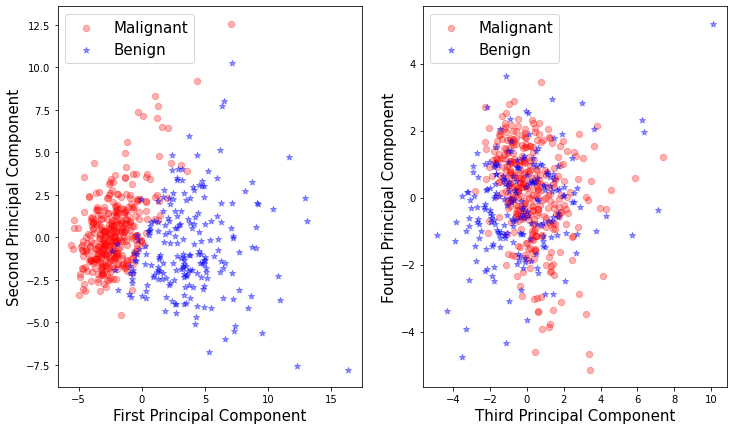

In [19]:
canc_diagnosis_list = data_breast_Can['diagnosis_fact'].tolist()
print (type(canc_diagnosis_list))

feature_scaled_pca_X0 = canc_feature_scaled_pca[:, 0]
feature_scaled_pca_X1 = canc_feature_scaled_pca[:, 1]
feature_scaled_pca_X2 = canc_feature_scaled_pca[:, 2]
feature_scaled_pca_X3 = canc_feature_scaled_pca[:, 3]

labels = canc_diagnosis_list
colordict = {0:'Red', 1:'Blue'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

# plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()

In [20]:
# Pipeline Steps are StandardScaler, PCA and SVM 
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [0.1, 0.5, 1, 10,30, 40, 50, 75, 100, 500, 1000], 
    'SupVM__gamma' : [0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)


In [21]:
from tqdm import tqdm_notebook as tqdm 

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



print ("Start Fitting Training Data")
for cv in tqdm(range(4,6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, y_train)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


  0%|          | 0/2 [00:00<?, ?it/s]

score for 4 fold CV := 0.90
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 500, 'SupVM__gamma': 0.01, 'pca__n_components': 2}
score for 5 fold CV := 0.89
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 1, 'SupVM__gamma': 0.01, 'pca__n_components': 2}
out of the loop


In [22]:
print ("grid best params: ", create_grid.best_params_) 
# use the best one

grid best params:  {'SupVM__C': 1, 'SupVM__gamma': 0.01, 'pca__n_components': 2}


Confusion Matrix: 

[[66 10]
 [ 3 35]]


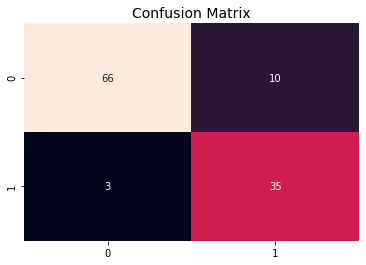

In [23]:
Y_pred = create_grid.predict(X_test)
# print (Y_pred)
cm = confusion_matrix(Y_pred, y_test)
print("Confusion Matrix: \n")
print(cm)


df_cm = pd.DataFrame(cm, range(2), range(2))

sns.heatmap(df_cm, annot=True, cbar=False)
plt.title("Confusion Matrix", fontsize=14)
plt.savefig("Confusion Matrix.png", dpi=200)

In [24]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1], dtype=int64)

initial decision function shape;  (37327,)
after reshape:  (163, 229)


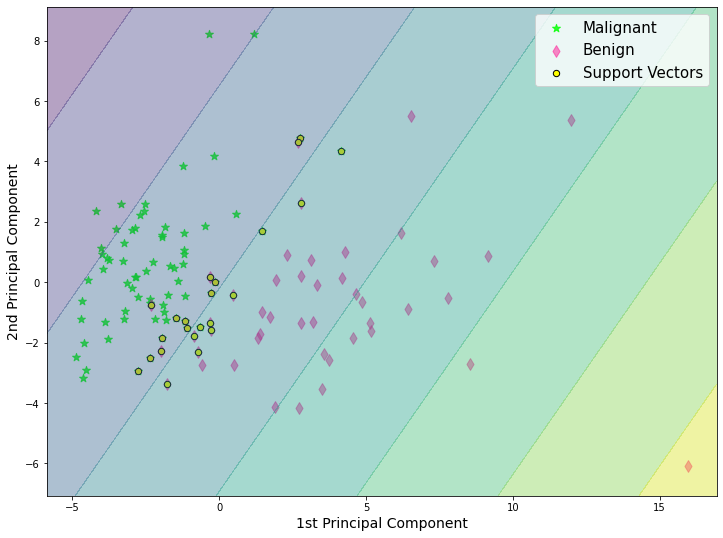

In [25]:
scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca2 = PCA(n_components=2)
X_test_scaled_reduced = pca2.fit_transform(X_test_scaled)


svm_model = SVC(kernel='linear', C=1., gamma=0.5)

classify = svm_model.fit(X_test_scaled_reduced, y_test)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print ('initial decision function shape; ', np.shape(Z))
    Z = Z.reshape(xx.shape)
    print ('after reshape: ', np.shape(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, facecolors='Yellow', 
           edgecolors='Black', label='Support Vectors')

plot_contours(ax, classify, xx, yy,cmap='viridis', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

#plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
plt.show()

## SVM model on test set


In [26]:
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

In [27]:
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.9473684210526315
precision: 1.0
recall 0.8666666666666667
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        69
           1       1.00      0.87      0.93        45

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## Hyperparameter to find the best model

In [28]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 12, 'kernel': 'linear'}
Accuracy: 0.9385964912280702
Confusion Matrix:
 [[68  6]
 [ 1 39]]


### Decision Tree

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree

# visualizing 
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [46]:
# X = np.array(data_breast_Can.iloc[:, 2:32])
# y = np.array(data_breast_Can['diagnosis'])
# X_train, X_test, y_train, y_test = train_test_split(
# X, y, test_size = 0.2, random_state = 1234)

# print ("train feature shape: ", X_train.shape)
# print ("test feature shape: ", X_test.shape)

train feature shape:  (455, 30)
test feature shape:  (114, 30)


In [43]:
#fitting Decision tree
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion="entropy",random_state=1234)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [44]:
# Evaluating on the test data
y_test_pred = clf_tree.predict(X_test);
acc_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_tree.predict(X_train);
acc_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(acc_train) + " and test data accuracy is " + repr(acc_test))

Training data accuracy is 1.0 and test data accuracy is 0.9035087719298246


In [3]:
# # from io import StringIO
# # dot_df = StringIO()
# # export_graphviz(tree, out_file=dot_df,
# #                 feature_names=df.col_names[0:9],  
# #                 class_names=df.diagnosis,
# #                 filled=True, rounded=True,
# #                 special_characters=True)
# # graph = pydotplus.graph_from_dot_df(dot_df.getvalue())  
# # Image(graph.create_png())

<!-- dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,
                feature_names=X_train[:],  
                class_names=X_train
                ,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) -->

In [45]:
from sklearn.model_selection import GridSearchCV
x = data_breast_Can.drop(['diagnosis'], axis=1)
tree = DecisionTreeClassifier(random_state=1234)
tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': range(3, 6)},
             scoring='recall')

In [46]:
#Best Parameters
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'entropy', 'max_depth': 2, 'max_features': 5},
 0.9341911764705884)

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

tree_pred = tree_grid.predict(X_test)

print ("Accuracy Score : ",accuracy_score(y_test, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_test, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_test, tree_pred))

Accuracy Score :  0.8771929824561403
Recall Score (how much of malignant tumours were predicted correctly) :  0.8222222222222222
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8604651162790697


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(tree_pred, y_test)

array([[63,  8],
       [ 6, 37]], dtype=int64)

In [64]:
from scipy.stats import randint as sp_randint
dt_clf = DecisionTreeClassifier(max_depth = 2, random_state=1234, max_features = 5)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 11), 
              'min_samples_leaf': sp_randint(1, 11)}


from sklearn.model_selection import RandomizedSearchCV
rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=17)
rand_dt = rand_dt.fit(X_train, y_train)

print(rand_dt.best_score_)
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

0.9319806763285025
{'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 8}
DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=8, random_state=1234)


In [65]:
tree_pred = tree_grid.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print ("Accuracy Score : ",accuracy_score(y_test, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_test, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_test, tree_pred))

Accuracy Score :  0.8771929824561403
Recall Score (how much of malignant tumours were predicted correctly) :  0.8222222222222222
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8604651162790697


In [67]:
from sklearn.tree import export_graphviz

[Text(167.4, 181.2, 'X[7] <= 0.051\ngini = 0.465\nsamples = 455\nvalue = [288, 167]'),
 Text(83.7, 108.72, 'X[0] <= 14.98\ngini = 0.083\nsamples = 278\nvalue = [266, 12]'),
 Text(41.85, 36.23999999999998, 'gini = 0.03\nsamples = 262\nvalue = [258, 4]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(251.10000000000002, 108.72, 'X[22] <= 103.25\ngini = 0.218\nsamples = 177\nvalue = [22, 155]'),
 Text(209.25, 36.23999999999998, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(292.95, 36.23999999999998, 'gini = 0.062\nsamples = 155\nvalue = [5, 150]')]

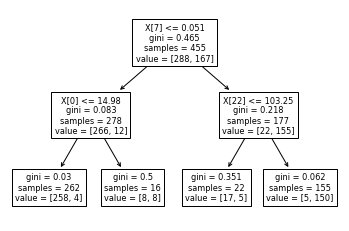

In [77]:
dt_clf = dt_clf.fit(X_train, y_train)
tree.plot_tree(dt_clf)

In [ ]:
tree_graph = export_graphviz(tree_grid.best_estimator_, class_names = ['benign', 'malignant'], feature_names = data_breast_Can.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png 

### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [158]:
model = RandomForestClassifier(n_estimators = 9)

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[1234],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
# model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#learning
model.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 7, 'kernel': 'rbf'}
Accuracy: 0.9210526315789473
Confusion Metrix:
 [[68  8]
 [ 1 37]]


In [162]:
model.estimators_[0].tree_.node_count

25

In [174]:
data_breast_Can.columns[2:32]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [183]:
plt.figure(figsize = (40,40)) 
_= tree.export_graphviz(model.estimators_[0], feature_names = data_breast_Can.columns[2:32], filled = True, out_file='tree.dot')

!dot -Tpng tree.dot -o tree.png 

<Figure size 2880x2880 with 0 Axes>

In [43]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 7, 'kernel': 'rbf'}
Accuracy: 0.9210526315789473
Confusion Matrix:
 [[68  8]
 [ 1 37]]


In [58]:
#Stratified split for the validation process
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters
rfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,3), 'max_depth': range(3,13), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=9, random_state=1234, n_jobs= -1)

gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=9, n_jobs=-1,
                                              random_state=1234),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 13),
                         'max_features': range(1, 11),
                         'min_samples_leaf': range(1, 3)},
             scoring='recall')

In [61]:
#RandomForest classifier with the default parameters 
rfc = RandomForestClassifier(n_estimators=9, criterion ='gini', max_depth = 8, max_features = 6, min_samples_leaf = 1, random_state = 17, n_jobs=-1)
forest_pred = gcv.predict(X_test)

print ("Accuracy Score : ",accuracy_score(y_test, forest_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_test, forest_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_test, forest_pred))

Accuracy Score :  0.9122807017543859
Recall Score (how much of malignant tumours were predicted correctly) :  0.8222222222222222
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9487179487179487


In [84]:
df = data_breast_Can

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [96]:
df.drop(['id'], axis = 1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_fact
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [97]:
df.shape

(569, 33)

In [190]:
estimators_tree_8 = rfc.estimators_[8]

estimators_tree_3 = rfc.estimators_[3]

estimators_tree_4 = rfc.estimators_[4]

In [191]:
tree_graph_8 = export_graphviz(estimators_tree_8, class_names = ['benign', 'malignant'], feature_names = data_breast_Can.columns[2:32], filled=True, out_file='tree_8.dot')
!dot -Tpng tree_8.dot -o tree_8.png 

tree_graph_3 = export_graphviz(estimators_tree_3, class_names = ['benign', 'malignant'], feature_names = data_breast_Can.columns[2:32], filled=True, out_file='tree_3.dot')
!dot -Tpng tree_3.dot -o tree_3.png 

tree_graph_4 = export_graphviz(estimators_tree_4, class_names = ['benign', 'malignant'], feature_names = data_breast_Can.columns[2:32], filled=True, out_file='tree_4.dot')
!dot -Tpng tree_4.dot -o tree_4.png

In [99]:
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1))])

rf_params = {'rf__max_features': range(3,10), 'rf__min_samples_leaf': range(1,3), 'rf__max_depth': range(5,12), 'rf__criterion':['gini','entropy']}


rf_pipe_grid = GridSearchCV(rf_pipe, rf_params, cv=10, scoring='recall')
rf_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=17))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(5, 12),
                         'rf__max_features': range(3, 10),
                         'rf__min_samples_leaf': range(1, 3)},
             scoring='recall')

In [104]:
print ("Accuracy Score on scaled data: ",accuracy_score(y_test, rf_pipe_grid.predict(X_test)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_test, rf_pipe_grid.predict(X_test)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_test, rf_pipe_grid.predict(X_test)))

Accuracy Score on scaled data:  0.9298245614035088
Recall Score (how much of malignant tumours were predicted correctly) :  0.8444444444444444
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9743589743589743


### Results

In [200]:
print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

models = []

Z = [SVC(kernel="linear") , KNeighborsClassifier(n_neighbors = 7), DecisionTreeClassifier(criterion="entropy"),
    RandomForestClassifier(n_estimators = 9)]


X = ["Support Vector Machine" , "KNeighborsClassifier" , "DecisionTreeClassifier" ,
    "RandomForestClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))

train feature shape:  (455, 30)
test feature shape:  (114, 30)


In [201]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.947368,Support Vector Machine
1,0.929825,KNeighborsClassifier
2,0.885965,DecisionTreeClassifier
3,0.956140,RandomForestClassifier


Text(0.5, 1.0, 'Accuracy of all Algorithms')

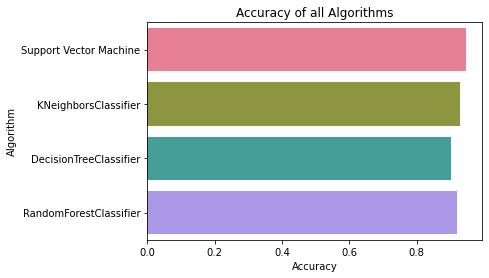

In [197]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')